<a href="https://colab.research.google.com/github/BehnamSherafat/Generating-Deterioration-Curves-for-Culverts-using-Machin-Learning/blob/main/UDOTCulvertAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sc
from IPython.display import display
# !pip install dexplot
#import dexplot as dxp
from sympy import S, symbols, printing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
# !pip install gmplot
#import gmplot
import IPython
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# evaluate random forest ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

from numpy import mean
from numpy import std

import math
import urllib.request
import json
from datetime import datetime
from scipy.stats import norm
# !pip install meteostat -U
# from meteostat import Stations, Point, Monthly, units
import copy
# !pip install category_encoders
#import category_encoders as ce

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance
from google.colab import  drive
from google.colab import files
uploaded = files.upload()
from statistics import mode
from sklearn.metrics import classification_report, confusion_matrix

Saving Vermont_culverts.csv to Vermont_culverts.csv


In [ ]:
sns.set(rc={'figure.figsize':(35,15)})

## Uploading Vermont Culverts Dataset

In [ ]:
# Upload Vermont Culvert Dataset

culverts = pd.read_csv("Vermont_culverts.csv")
culverts.head(5)

,id,town,road,rd_imp,rd_imp_ovr,bankfull_w,bankfull_w_source,twn_hwy_cd,local_id,location,...,drop_inlet,alignment,dir_output,perched,need_clean,comment1,comment2,comment3,comment4,comment_no
0,16dc5fc1-3593-4b85-b621-000015458e28,BARNET,KEYSER HILL RD,1.0,NaN,0.0,VTC,NaN,(local ID not imported),NaN,...,No,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
1,881f61e3-4cdf-45b1-9c84-00013a9e834f,CABOT,WHITTIER HILL RD,1.0,NaN,0.0,VTC,39,230200497T,NaN,...,No,Unknown,Unknown,Unknown,Unknown,rust condition NA,photo#4741.4742,amount open 12,NaN,0.0
2,dcf7a65c-cf78-4ebd-ba09-0001a36d8c5f,CHESTER,POPPLE DUNGEON RD,1.0,NaN,1.0,ANR,10,POPPLE DUNGEON RD-10,NaN,...,No,Unknown,Unknown,Unknown,No,NaN,NaN,NaN,DP,10.0
3,9e075e9f-a2d0-4d3d-bf1a-0001c116bc60,JOHNSON,UPPER FRENCH HILL RD,2.0,NaN,0.0,VTC,5,5-Mar,NaN,...,No,No,No,Yes,No,"photo number 0280, 281",NaN,NaN,NaN,0.0
4,42514208-257a-4e59-bbce-00021e9adb84,STOCKBRIDGE,LILLIESVILLE RD,1.0,0.0,NaN,NaN,NaN,7,NaN,...,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN,NaN,NaN,0.0


## **Analysing All Features**

In [ ]:
# culverts.drop(['id', 'owner', 'town', 'latitude', 'longitude', 'drop_inlet', "road", "rd_imp_ovr", "bankfull_w", "bankfull_w_source", "erosion", "hdr_cond", "cover_dpt", "dir_output", "perched", "need_clean", "twn_hwy_cd", "local_id", "location", "x_coord", "y_coord", "historic", "label", "comment1", "comment2", "comment3", "comment4", "comment_no"], axis=1, inplace=True)
culverts.drop(['drop_inlet', "road", "rd_imp_ovr", "bankfull_w", "bankfull_w_source", "erosion", "hdr_cond", "cover_dpt", "dir_output", "perched", "need_clean", "twn_hwy_cd", "local_id", "location", "x_coord", "y_coord", "historic", "label", "comment1", "comment2", "comment3", "comment4", "comment_no"], axis=1, inplace=True)
# culverts = culverts.fillna(culverts.mode().iloc[0])
# culverts['cul_type'].unique()

In [ ]:
culverts.loc[(culverts.alignment == 'Unknown'),'alignment'] = np.nan
culverts.dropna(subset=['height'], inplace=True)
culverts.drop(culverts.index[culverts['height'] > 100], inplace = True)
culverts.drop(culverts.index[culverts['height'] <= 1], inplace = True)
culverts.loc[(culverts.hdr_matl == 'Unknown'),'hdr_matl'] = np.nan
culverts.loc[(culverts.hdr_matl == 'None'),'hdr_matl'] = np.nan
culverts.loc[(culverts.rd_imp == 0),'rd_imp'] = np.nan
culverts.drop(culverts.index[culverts['year_built'] == 0], inplace = True)
culverts.dropna(subset=['year_built'], inplace=True)
culverts = culverts.drop(culverts[(culverts['year_built'] <= 1900) | (culverts['year_built'] >= 2022)].index)
culverts.dropna(subset=['inv_dt'], inplace=True)
culverts.loc[(culverts.cul_type == "Unknown"),'cul_type'] = np.nan
culverts.loc[(culverts.cul_matl == "Unknown"),'cul_matl'] = np.nan
culverts = culverts[culverts.oa_cond != "Unknown"]


In [ ]:
culverts = culverts.dropna(axis=0, how="any")

In [ ]:
culverts
culverts.to_csv('Vermont_culverts_filtered.csv') 
files.download('Vermont_culverts_filtered.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Is the culvert poorly aligned with the stream channel that it is crossing? "Yes" and "No"
culverts['alignment'].unique()
# culverts.drop(culverts.index[culverts['alignment'] == 'Unknown'], inplace = True)
culverts.loc[(culverts.alignment == 'Unknown'),'alignment'] = np.nan
# culverts['alignment'].fillna(value=culverts['alignment'].mode()[0], inplace=True)

tempdf = pd.get_dummies(culverts["alignment"], prefix='aligned')
culverts = pd.merge(left=culverts, right=tempdf, left_index=True, right_index=True)
culverts.drop(["alignment"], axis=1, inplace=True)

In [ ]:
# outlet_area
culverts.dropna(subset=['height'], inplace=True)
culverts.drop(culverts.index[culverts['height'] > 100], inplace = True)
culverts.drop(culverts.index[culverts['height'] <= 1], inplace = True)
culverts["height"] = culverts["height"].astype(int)
culverts['height'].unique()
# culverts.hist(column='height',bins=100)
culverts["outlet_area"] = culverts["height"] * culverts["width"]
culverts.drop(culverts.index[culverts['outlet_area'] > 1000], inplace = True)
# culverts.hist(column='outlet_area',bins=100)

def age_distribution(data):
    data.loc[data['outlet_area'] <= 200, 'size'] = 'small'
    data.loc[(data['outlet_area'] > 200) & (data['outlet_area'] <= 500), 'size'] = 'medium'
    data.loc[(data['outlet_area'] > 500), 'size'] = 'large'

    return data


culverts = age_distribution(culverts)

tempdf = pd.get_dummies(culverts["size"], prefix='size')
culverts = pd.merge(left=culverts, right=tempdf, left_index=True, right_index=True)
culverts.drop(["size"], axis=1, inplace=True)

culverts["width"] = culverts["width"].astype(int)
culverts["length"] = culverts["length"].astype(int)
culverts["outlet_area"] = culverts["outlet_area"].astype(int)


In [ ]:
# Header Material
culverts['hdr_matl'].unique()
# culverts.drop(culverts.index[culverts['hdr_matl'] == 'Unknown'], inplace = True)
# culverts.drop(culverts.index[culverts['hdr_matl'] == 'None'], inplace = True)
# culverts = culverts[culverts['hdr_matl'].notna()]
culverts.loc[(culverts.hdr_matl == 'Unknown'),'hdr_matl'] = np.nan
culverts.loc[(culverts.hdr_matl == 'None'),'hdr_matl'] = np.nan
culverts['hdr_matl'].fillna(value=culverts['hdr_matl'].mode()[0], inplace=True)

tempdf = pd.get_dummies(culverts["hdr_matl"], prefix='hdr_matl')
culverts = pd.merge(left=culverts, right=tempdf, left_index=True, right_index=True)
culverts.drop(["hdr_matl"], axis=1, inplace=True)

In [ ]:
# rd_imp (Scores range from 1-3, with higher scores indicating a higher priority)
# culverts.drop(culverts.index[culverts['rd_imp'] == 0], inplace = True)
# culverts = culverts[culverts['rd_imp'].notna()]
culverts.loc[(culverts.rd_imp == 0),'rd_imp'] = np.nan
culverts['rd_imp'].fillna(value=culverts['rd_imp'].mode()[0], inplace=True)

tempdf = pd.get_dummies(culverts["rd_imp"], prefix='rd_imp')
culverts = pd.merge(left=culverts, right=tempdf, left_index=True, right_index=True)
culverts.drop(["rd_imp"], axis=1, inplace=True)

In [ ]:
# year_built (Year structure was built, if known)
culverts.drop(culverts.index[culverts['year_built'] == 0], inplace = True)
culverts.dropna(subset=['year_built'], inplace=True)
culverts["year_built"] = pd.to_numeric(culverts["year_built"])
culverts = culverts.drop(culverts[(culverts['year_built'] <= 1900) | (culverts['year_built'] >= 2022)].index)
culverts["year_built"] = culverts["year_built"].astype(int)

In [ ]:
# inv_dt (Date of inspection/inventory)
culverts.dropna(subset=['inv_dt'], inplace=True)
culverts['date'] = pd.to_datetime(culverts['inv_dt'])
culverts['invetory_year'] = culverts['date'].dt.year
culverts.drop(["inv_dt", "date"], axis=1, inplace=True)
culverts["invetory_year"] = culverts["invetory_year"].astype(int)

In [ ]:
# Age
culverts['Age'] = culverts['invetory_year'] - culverts['year_built']
culverts = culverts[culverts.Age >= 0]
culverts["Age"] = culverts["Age"].astype(int)
culverts.drop(['year_built'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# def age_distribution(data):
#     data.loc[data['Age'] <= 10, 'AgeGroup'] = 1
#     data.loc[(data['Age'] > 10) & (data['Age'] <= 20), 'AgeGroup'] = 2
#     data.loc[(data['Age'] > 20) & (data['Age'] <= 30), 'AgeGroup'] = 3
#     data.loc[(data['Age'] > 30) & (data['Age'] <= 40), 'AgeGroup'] = 4
#     data.loc[(data['Age'] > 40) & (data['Age'] <= 50), 'AgeGroup'] = 5
#     data.loc[(data['Age'] > 50) & (data['Age'] <= 60), 'AgeGroup'] = 6
#     data.loc[(data['Age'] > 60) & (data['Age'] <= 70), 'AgeGroup'] = 7
#     data.loc[(data['Age'] > 70), 'AgeGroup'] = 8
#     #data['AgeGroup'].astype(int)
#     return data


# culverts_steel_new_binary = age_distribution(culverts_steel_new_binary)
# culverts_steel_new_binary.drop(["Age"], axis=1, inplace=True)

In [ ]:
# cul_type (Type of structure)
# culverts = culverts[culverts.cul_type != "Unknown"]
culverts.loc[(culverts.cul_type == "Unknown"),'cul_type'] = np.nan
culverts['cul_type'].fillna(value=culverts['cul_type'].mode()[0], inplace=True)
tempdf = pd.get_dummies(culverts["cul_type"], prefix='type')
culverts = pd.merge(left=culverts, right=tempdf, left_index=True, right_index=True)
culverts.drop(["cul_type"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
# cul_matl (Material of structure)
# culverts = culverts[culverts.cul_matl != "Unknown"]
culverts.loc[(culverts.cul_matl == "Unknown"),'cul_matl'] = np.nan
culverts['cul_matl'].fillna(value=culverts['cul_matl'].mode()[0], inplace=True)
tempdf = pd.get_dummies(culverts["cul_matl"], prefix='matl')
culverts = pd.merge(left=culverts, right=tempdf, left_index=True, right_index=True)
culverts.drop(["cul_matl"], axis=1, inplace=True)

In [ ]:
# oa_cond (The condition of the culvert)
# Excellent - recently constructed, no visible deficiencies;
# Good - at least 75% open, few if any minor deficiencies;
# Fair - at least 50% open, some existing or developing deficiencies;
# Poor - at least 25% open and/or has serious deficiencies;
# Critical - less than 25% open and/or has critical deficiencies;
# Urgent - Critical deficiencies have forced the structure to be closed. Structure is closed to traffic;
# Unknown - cannot provide a reasonable evaluation due to the structure not being visible, property owner, etc.

culverts = culverts[culverts.oa_cond != "Unknown"]
cleanup_nums = {"oa_cond": {"Closed": 0, "Urgent": 0, "Critical": 1, "Poor": 2, "Fair": 3, "Good": 3, "Excellent": 4}}
culverts = culverts.replace(cleanup_nums)
culverts["oa_cond"] = culverts["oa_cond"].astype(int)

In [ ]:
culverts["oa_cond"].unique()

array([4, 3, 2, 0])

## Adding Weather Data (Average of Annual Percipitation, minimum temp, and max temp)

In [ ]:
culverts_new = culverts.copy()
# i = 1
# for index, row in culverts.iterrows():
  
#   # station = Point(row["latitude"], row["longitude"])

#   # Set time period
#   start = datetime(int(row["invetory_year"]), 1, 1)
#   end = datetime(2021, 12, 31)

#   # Get Monthly data
#   data = Monthly('72614', start, end)
#   data = data.normalize()
#   data = data.aggregate('1Y')
#   data = data.fetch()
#   culverts_new.at[index , 'sum_ann_precipitation'] = data["prcp"].mean()
#   culverts_new.at[index , 'tmin'] = data["tmin"].mean()
#   culverts_new.at[index , 'tmax'] = data["tmax"].mean()
#   i += 1

# end

# culverts_new.drop(culverts_new.index[culverts_new['sum_ann_precipitation'] == 0], inplace = True)
# culverts_new.dropna(subset=['sum_ann_precipitation'], inplace=True)

# culverts_new.drop(culverts_new.index[culverts_new['tmin'] == 0], inplace = True)
# culverts_new.dropna(subset=['tmin'], inplace=True)

# culverts_new.drop(culverts_new.index[culverts_new['tmax'] == 0], inplace = True)
# culverts_new.dropna(subset=['tmax'], inplace=True)

# culverts_new["sum_ann_precipitation"] = culverts_new["sum_ann_precipitation"].astype(int)
# culverts_new["tmin"] = culverts_new["tmin"].round(decimals=2)
# culverts_new["tmax"] = culverts_new["tmax"].round(decimals=2) 

In [ ]:
culverts_new

,id,town,latitude,longitude,owner,height,width,length,oa_cond,aligned_No,...,matl_Aluminum Corrugated,matl_Concrete Poured,matl_Concrete Sectional,matl_Metal - undefined type,matl_Mixed,"matl_Pipe, Metal","matl_Pipe, Plastic",matl_Plastic Corrugated,matl_Plastic Smooth,matl_Steel Corrugated
115,a56bb324-21e7-480c-8221-00494834cb83,SPRINGFIELD,43.321873,-72.430128,Town Highway,18,18,30,4,1,...,0,0,0,0,0,0,0,0,1,0
457,6366ddce-d90f-4911-8733-01273901ba39,WILMINGTON,42.880059,-72.855597,Town Highway,18,18,42,4,1,...,0,0,0,0,0,0,0,0,1,0
930,6b2c4c82-85e4-4dd6-9e1b-0249ed4cccd6,READING,43.476755,-72.577072,Town Highway,15,15,20,3,1,...,0,0,0,0,0,0,0,1,0,0
1049,2f34a9da-d730-4bd0-ae65-02916a25fc1f,DERBY,44.897907,-72.178037,Town Highway,18,18,30,4,1,...,0,0,0,0,0,0,0,0,0,1
1161,91666ac2-3615-4462-9336-02e1fa557f7e,UNDERHILL,44.539616,-72.871014,Town Highway,24,24,60,4,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106964,764fe695-5089-4aa2-9055-fea6df12748b,SPRINGFIELD,43.297104,-72.518305,Town Highway,18,18,40,3,1,...,0,0,0,0,0,0,0,0,1,0
107021,65e41972-5337-4c95-bdda-fec6cb349740,WAITSFIELD,44.163710,-72.813419,Town Highway,24,24,92,3,1,...,0,0,0,0,0,0,0,1,0,0
107044,1d9567ed-43ed-4e58-b701-fed96602dbc8,WINDSOR,43.467038,-72.428586,Town Highway,18,18,35,3,1,...,0,0,0,0,0,0,0,1,0,0
107240,7bee5e04-ce82-4d70-9995-ff49e6fde127,HALIFAX,42.802345,-72.777279,Town Highway,24,24,40,3,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# drive.mount('/drive')
# culverts_new.to_csv('/drive/My Drive/Culvert_new/culverts_final.csv')

In [ ]:
culverts_new.drop(['invetory_year'], axis=1, inplace=True)
culverts_new

,id,town,latitude,longitude,owner,height,width,length,oa_cond,aligned_No,...,matl_Aluminum Corrugated,matl_Concrete Poured,matl_Concrete Sectional,matl_Metal - undefined type,matl_Mixed,"matl_Pipe, Metal","matl_Pipe, Plastic",matl_Plastic Corrugated,matl_Plastic Smooth,matl_Steel Corrugated
115,a56bb324-21e7-480c-8221-00494834cb83,SPRINGFIELD,43.321873,-72.430128,Town Highway,18,18,30,4,1,...,0,0,0,0,0,0,0,0,1,0
457,6366ddce-d90f-4911-8733-01273901ba39,WILMINGTON,42.880059,-72.855597,Town Highway,18,18,42,4,1,...,0,0,0,0,0,0,0,0,1,0
930,6b2c4c82-85e4-4dd6-9e1b-0249ed4cccd6,READING,43.476755,-72.577072,Town Highway,15,15,20,3,1,...,0,0,0,0,0,0,0,1,0,0
1049,2f34a9da-d730-4bd0-ae65-02916a25fc1f,DERBY,44.897907,-72.178037,Town Highway,18,18,30,4,1,...,0,0,0,0,0,0,0,0,0,1
1161,91666ac2-3615-4462-9336-02e1fa557f7e,UNDERHILL,44.539616,-72.871014,Town Highway,24,24,60,4,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106964,764fe695-5089-4aa2-9055-fea6df12748b,SPRINGFIELD,43.297104,-72.518305,Town Highway,18,18,40,3,1,...,0,0,0,0,0,0,0,0,1,0
107021,65e41972-5337-4c95-bdda-fec6cb349740,WAITSFIELD,44.163710,-72.813419,Town Highway,24,24,92,3,1,...,0,0,0,0,0,0,0,1,0,0
107044,1d9567ed-43ed-4e58-b701-fed96602dbc8,WINDSOR,43.467038,-72.428586,Town Highway,18,18,35,3,1,...,0,0,0,0,0,0,0,1,0,0
107240,7bee5e04-ce82-4d70-9995-ff49e6fde127,HALIFAX,42.802345,-72.777279,Town Highway,24,24,40,3,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X = culverts_new.drop(['oa_cond'],axis = 1)
Y = culverts_new['oa_cond']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# f, ax = plt.subplots(figsize = [25, 16])
# sns.heatmap(culverts_steel_new_binary.corr(), linewidths=0.5, annot=True, cmap='YlGnBu', square = True)

# **Regression**

## Polynominal Regression Curve for Condition Rating from Unfiltered Data

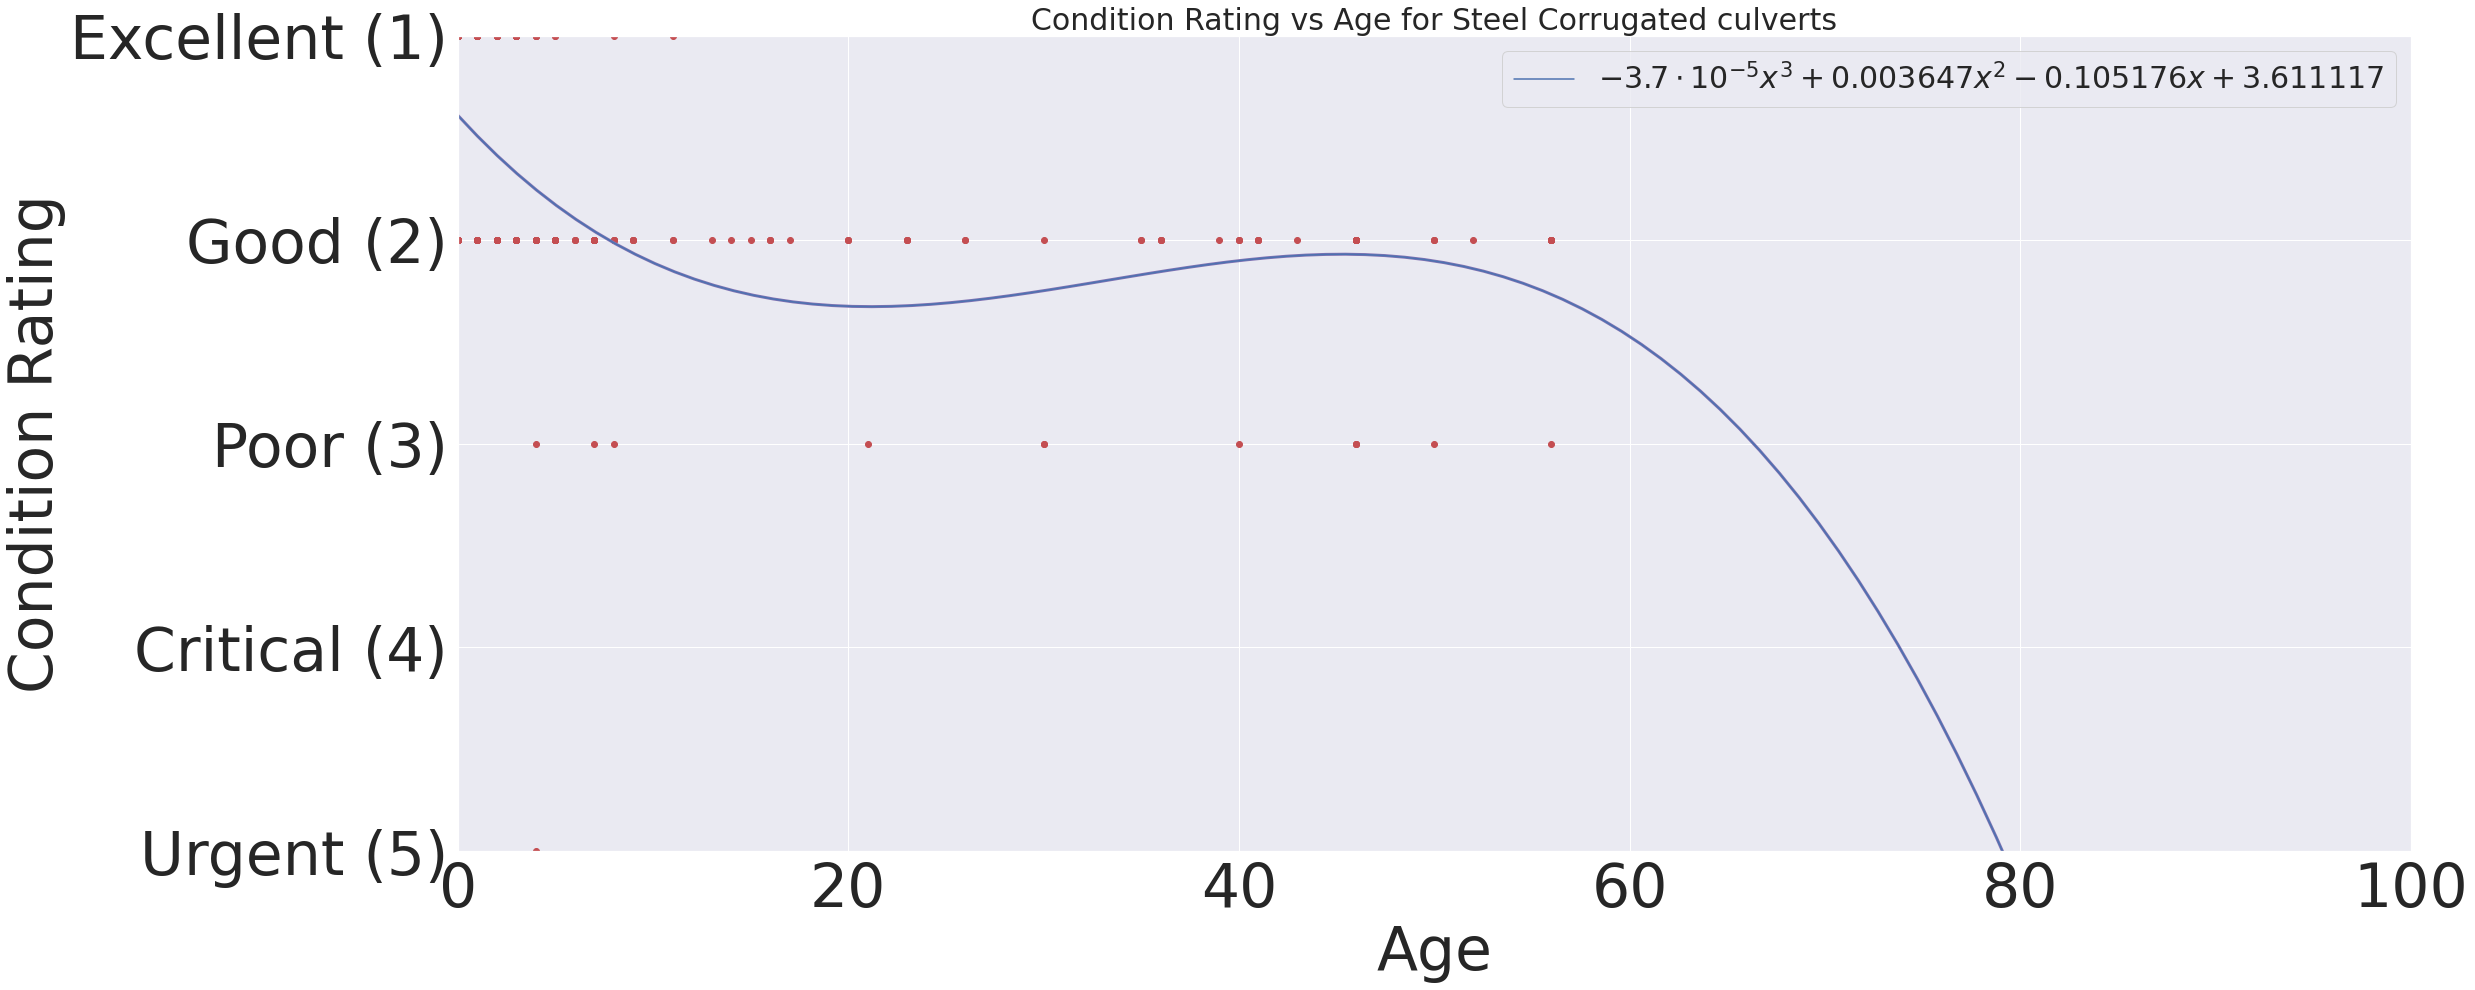

In [ ]:
label_size = 60

culverts_reg = culverts_new.loc[culverts_new['matl_Steel Corrugated'] == 1, ["Age","oa_cond"]]
culverts_reg = culverts_reg[culverts_reg['Age'] <= 60]

x = culverts_reg['Age'].tolist()
y = culverts_reg["oa_cond"].tolist()

mymodel = np.polyfit(x, y, 3)
f = np.poly1d(mymodel)

myline = np.linspace(culverts_reg["Age"].min(), 100, 100)
plt.scatter(x, y, c='r')
plt.plot(myline, f(myline),'m', linewidth=3)

# Add title and axis names
plt.title('Condition Rating vs Age for Steel Corrugated culverts',fontsize=30)
plt.xlabel('Age')
plt.ylabel('Condition Rating')
axes = plt.gca()
axes.xaxis.label.set_size(label_size)
plt.xticks(fontsize=label_size)
axes.yaxis.label.set_size(label_size)

y1 = [0,1,2,3,4]
squad = ["Urgent (5)", "Critical (4)", "Poor (3)", "Good (2)", "Excellent (1)"]
axes.set_yticks(y1)
axes.set_yticklabels(squad, minor=False, Fontsize=label_size)
plt.xlim([0, 100])
plt.ylim([0, 4])

x = symbols("x")
poly = sum(S("{:6.6f}".format(v))*x**i for i, v in enumerate(mymodel[::-1]))
eq_latex = printing.latex(poly)
y_new = f(myline)
plt.plot(myline, y_new, label="${}$".format(eq_latex))
plt.legend(prop={'size': 30})

plt.show()

## 2. Polynominal Regression Curve for **Average Condition Rating** from Unfiltered Data

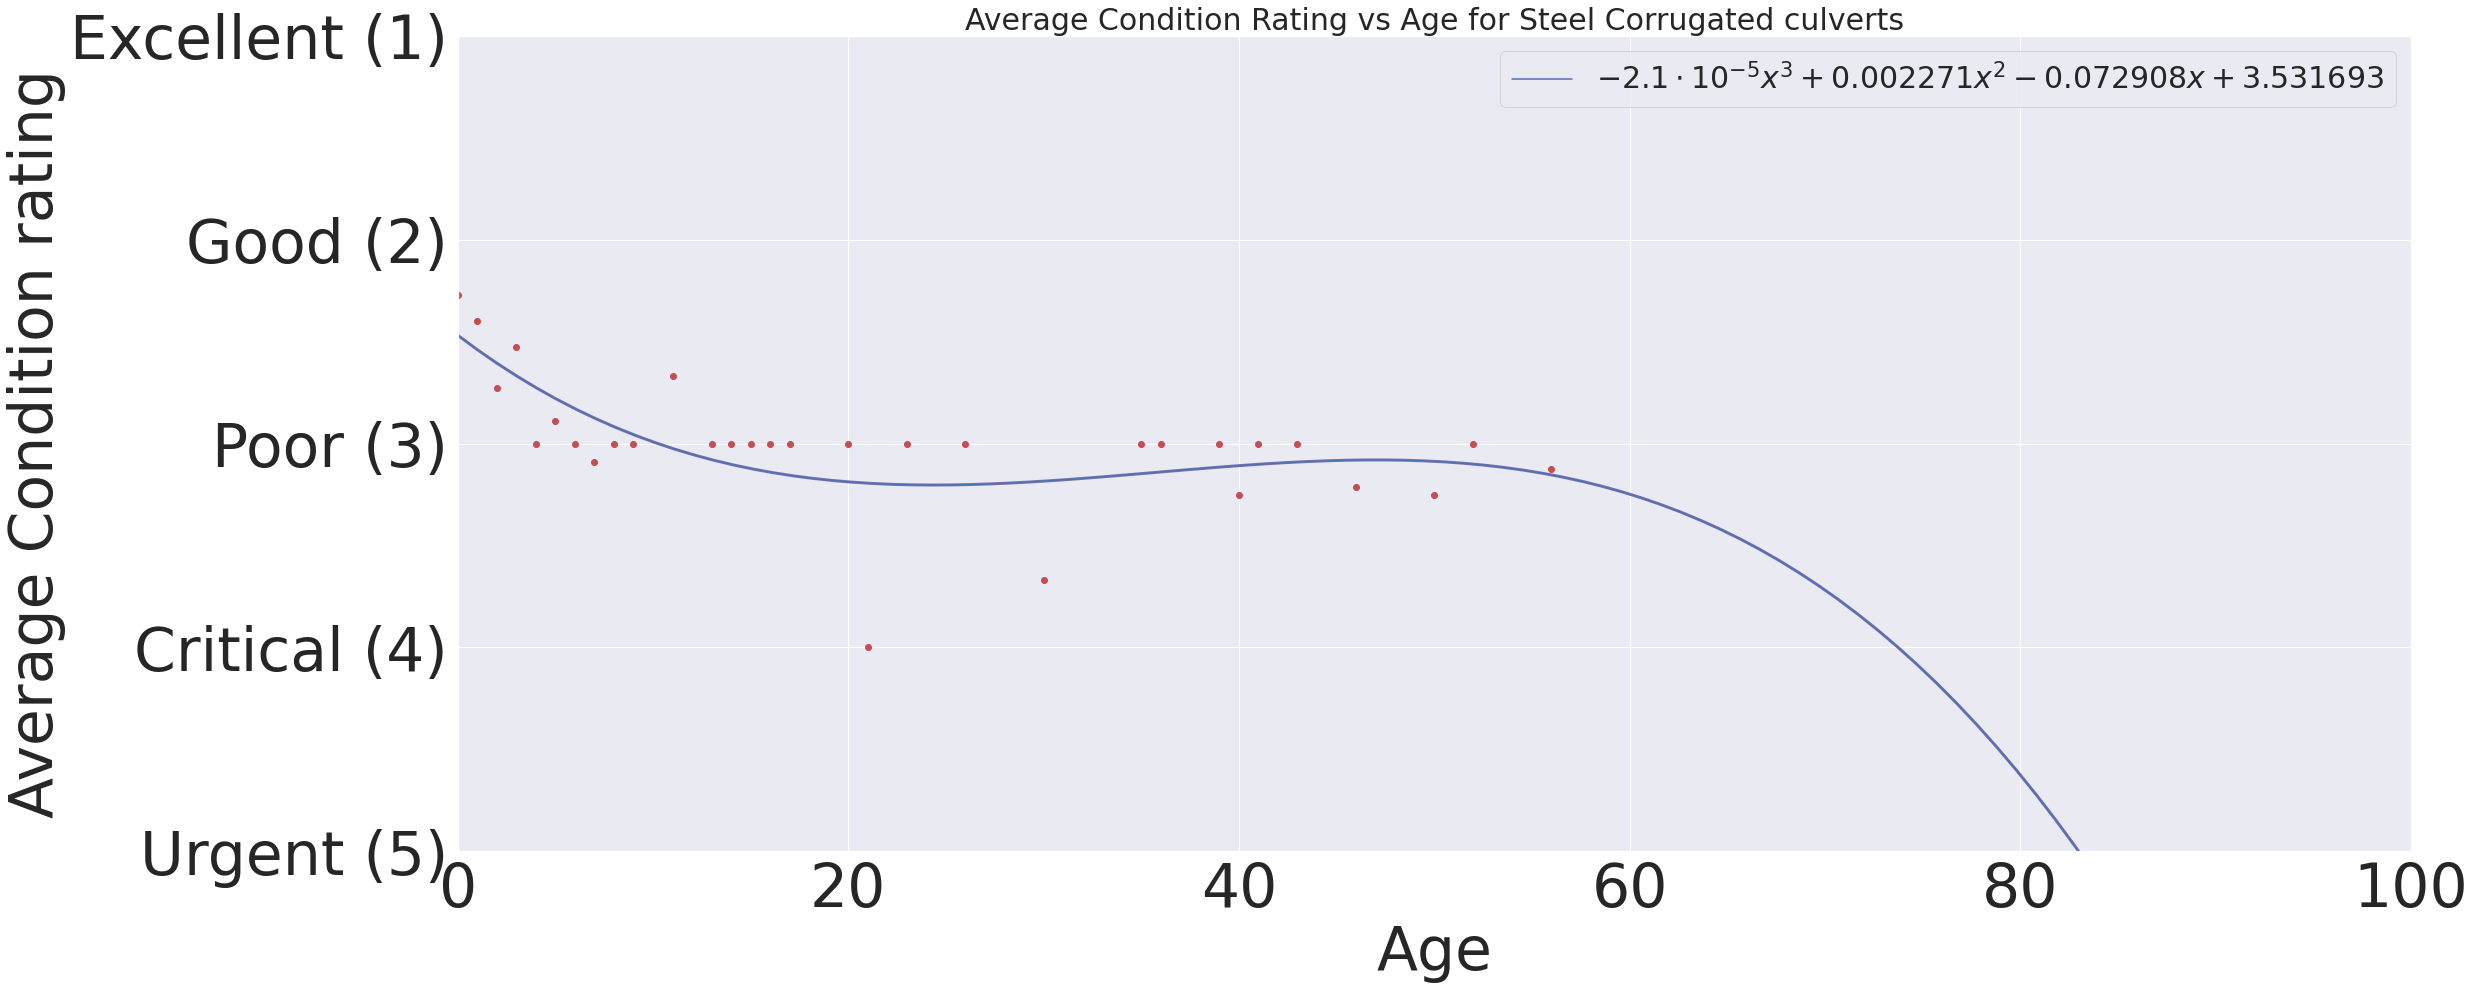

In [ ]:
def average_cond_rating(df):
  x_avg = []
  x = list(df.Age.unique())

  for i in range(0,len(x)):
    x_avg.append(df[df.Age == x[i]].mean().oa_cond)

  y = x_avg
  return x, y

label_size = 60

culverts_reg = culverts_new.loc[culverts_new['matl_Steel Corrugated'] == 1, ["Age","oa_cond"]]
culverts_reg = culverts_reg[culverts_reg['Age'] <= 60]

x, y = average_cond_rating(culverts_reg)
mymodel = np.polyfit(x, y, 3)
f = np.poly1d(mymodel)

myline = np.linspace(culverts_reg["Age"].min(), 100, 100)
plt.scatter(x, y, c='r')
plt.plot(myline, f(myline),'m', linewidth=3)
# Add title and axis names
plt.title('Average Condition Rating vs Age for Steel Corrugated culverts',fontsize=30)
plt.xlabel('Age')
plt.ylabel('Average Condition rating')
axes = plt.gca()
axes.xaxis.label.set_size(label_size)
plt.xticks(fontsize=label_size)
axes.yaxis.label.set_size(label_size)

y1 = [1,2,3,4,5]
squad = ["Urgent (5)", "Critical (4)", "Poor (3)", "Good (2)", "Excellent (1)"]
axes.set_yticks(y1)
axes.set_yticklabels(squad, minor=False, Fontsize=label_size)
plt.xlim([0, 100])
plt.ylim([1, 5])

x = symbols("x")
poly = sum(S("{:6.6f}".format(v))*x**i for i, v in enumerate(mymodel[::-1]))
eq_latex = printing.latex(poly)
y_new = f(myline)
plt.plot(myline, y_new, label="${}$".format(eq_latex))
plt.legend(prop={'size': 30})
plt.show()


## Random Forest Regression

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 328, in fit
    X, y, multi_output=True, accept_sparse="csc", dtype=DTYPE
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/

ValueError: ignored

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


In [ ]:
# Generate Synthetic Dataset for Test
culverts_test = culverts_new.copy()

culverts_test = culverts_test[culverts_test['matl_Concrete Sectional'] == 1]

culverts_test = culverts_test.drop(['oa_cond'],axis = 1)
culverts_test['rd_imp_1.0'] = 0
culverts_test['rd_imp_2.0'] = 1
culverts_test['rd_imp_3.0'] = 0

culverts_test['size_small'] = 1
culverts_test['size_medium'] = 0
culverts_test['size_large'] = 0
culverts_test


In [ ]:
label_size = 60
max_age = 30
ages = list(range(0, max_age))

dicts = {}
for age in ages:
  culverts_test['Age'] = age
  dicts[age] = rf_random.best_estimator_.predict(culverts_test)


conditions = list(range(0,max_age))
for key, value in dicts.items():
  conditions[int(key)] = mean(list(value))

x = ages
y = conditions

mymodel = np.polyfit(x, y, 3)
f = np.poly1d(mymodel)

myline = np.linspace(min(x), 100, 100)
plt.scatter(x, y, c='r', s=300)
plt.plot(myline, f(myline),'m', linewidth=4)
# Add title and axis names
plt.title('Deterioration Curve for Steel Corrugated Culverts, Road Importance 1, and Size Small',fontsize=30)
plt.xlabel('Age')
plt.ylabel('Condition Rating')
axes = plt.gca()
axes.xaxis.label.set_size(label_size)
plt.xticks(fontsize=label_size)
axes.yaxis.label.set_size(label_size)
y1 = [0,1,2,3,4]
squad = ["Critical Defects (5)", "Major Defects (4)", "Significant Defects (3)", "Moderate Defects (2)", "Minor Defects (1)"]
axes.set_yticks(y1)
axes.set_yticklabels(squad, minor=False, Fontsize=label_size)
plt.xlim([0, 100])
plt.ylim([0, 4])



x = symbols("x")
poly = sum(S("{:6.6f}".format(v))*x**i for i, v in enumerate(mymodel[::-1]))
eq_latex = printing.latex(poly)
y_new = f(myline)
plt.plot(myline, y_new, label="${}$".format(eq_latex))
plt.legend(prop={'size': label_size})

plt.show()

## **Ridge and Lasso**

In [ ]:
alphas = 10**np.linspace(10,-10,100)*0.5
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
  ridge.set_params(alpha=a)
  ridge.fit(X, y)
  coefs.append(ridge.coef_)

np.shape(coefs)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(scale(X_train), y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)


In [ ]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)
lassocv.alpha_
# lasso.set_params(alpha=lassocv.alpha_)
# lasso.fit(X_train, y_train)
# mean_squared_error(y_test, lasso.predict(X_test))

In [ ]:
pd.Series(lasso.coef_, index=X.columns)

In [ ]:
parameters_xg = {'max_depth':[3,6,7], 'learning_rate': [0.1,0.2], 'n_estimators': [300,200], 
                 'min_child_weight': [4], 'reg_alpha': [6,0], 'reg_lambda': [1,8],'max_delta_step':[2],
                 'gamma':[0],'seed':[1]}

parameters_svm = {'C':[0.9,0.01],'kernel':['rbf','linear'], 'gamma':[0,0.1,'auto'], 'probability':[True,False],
                  'random_state':[0,7,16],'decision_function_shape':['ovo','ovr'],'degree':[3,4,10]}

parameters_rf = {'n_estimators': [100,50], 'max_features': [7,'auto',None],
                 'n_jobs': [-1], 'min_samples_leaf': [2,4,], 'random_state':[1,7,], 
                 'min_samples_split':[2,6,], 'oob_score': [True,False],
                 'criterion': ['gini'], 'warm_start': [True,False]}

In [ ]:
def grid(model,parameters):
    grid = GridSearchCV(estimator = model, param_grid = parameters, cv = 5, 
                        scoring = 'accuracy')
    grid.fit(npX,npy)
    return grid.best_score_, grid.best_estimator_.get_params()

In [ ]:
def imp_features(model, model_name, params):
    Model = model(**params)
    Model.fit(npX,npy)
    names = X.columns
    feature = Model.feature_importances_
    important_features = pd.Series(data = feature, index = names,)
    important_features = important_features.sort_values(ascending = True)
    return important_features.plot(kind = 'barh', grid = False,title = model_name)

In [ ]:
culverts_new.boxplot('Age','cul_matl',rot = 30,figsize=(25,15))

In [ ]:
data['Cabin'] = data['Cabin'].replace(['B', 'D', 'E'], 'H')   #High
data['CabinGroup'] = data['Cabin'].map({'H': 0, 'M': 1, 'L': 2, 'X':3})

In [ ]:
df10 = culverts_steel.groupby('oa_cond').agg({'Age': 'median'})
df10 = df10.sort_values(by=['oa_cond'], ascending=False)

mymodel = np.polyfit(df10["Age"], df10.index, 1)
f = np.poly1d(mymodel)

x = symbols("x")
poly = sum(S("{:6.2f}".format(v))*x**i for i, v in enumerate(mymodel[::-1]))
eq_latex = printing.latex(poly)

myline = np.linspace(df10["Age"].min(), df10["Age"].max(), 1000)
y_new = f(myline)

plt.scatter(df10["Age"], df10.index, c='r')
plt.plot(myline, y_new, label="${}$".format(eq_latex))
plt.legend(fontsize="large")

plt.show()

# a = (4.89 - 0.09 * 10) - (4.89 - 0.09 * 15) # steel
a = (6.78 - 0.24 * 10) - (6.78 - 0.24 * 15) # Plastic
a = (8.55 - 0.13 * 10) - (8.55 - 0.13 * 15) # Aluminum Corrugated

print(f'Steel Corrugated culverts condition drops by {a:.4f} every 5 years.')

# **SVM**

## **Stochastic Model (No completed yet)**

In [ ]:
# Create Transition Probability Matrix (TPM)

unique_conditions = df4.oa_cond.unique().tolist()
list(map(int, unique_conditions))
unique_conditions.sort(reverse=True)
states = unique_conditions
TPM = pd.DataFrame(np.zeros((len(unique_conditions), len(unique_conditions))), index=unique_conditions, columns=unique_conditions)

study_years = range(1940,2020)
def tpm(df):
  TPM.iloc[unique_conditions[-1],unique_conditions[-1]] = 1 

  for year in study_years:
    TPM_temp = pd.DataFrame(np.zeros((len(unique_conditions), len(unique_conditions))), index=unique_conditions, columns=unique_conditions)
    for i in unique_conditions:
      for j in unique_conditions:

        if i == j:
          if i == j == unique_conditions[-1]:
            TPM_temp.iloc[unique_conditions[i],unique_conditions[j]] = 1
          else:
            if len(df4[(df4["year_built"] < year + 1) & (df4["year"] == year + 1) & (df4["Age"] <= 10)]) != 0:
              TPM_temp.iloc[unique_conditions[i],unique_conditions[j]] = 1 - (len(df4[(df4["year_built"] < year + 1) & (df4["year"] == year + 1) & (df4["Age"] <= 10) & (df4["oa_cond"] != i)])/len(df4[(df4["year_built"] < year + 1) & (df4["year"] == year + 1) & (df4["Age"] <= 10)]))              
            else:
              TPM_temp.iloc[unique_conditions[i],unique_conditions[j]] = 1


        elif i < j:
          TPM_temp.iloc[unique_conditions[i],unique_conditions[j]] = 0



        elif j == i - 1:
          if len(df4[(df4["year"] == year) & (df4["oa_cond"] == j)]) + len(df4[(df4["year"] == year) & (df4["oa_cond"] == i)]) != 0:
            TPM_temp.iloc[unique_conditions[i],unique_conditions[j]] = len(df4[(df4["year"] == year) & (df4["oa_cond"] == j)]) / len(df4[(df4["year"] == year) & (df4["oa_cond"] == j)]) + len(df4[(df4["year"] == year) & (df4["oa_cond"] == i)])


        else:
          TPM_temp.iloc[unique_conditions[i],unique_conditions[j]] = 0

    TPM = TPM.add(TPM_temp)

  return TPM/len(study_years)

y = tpm(df4)
y

# **ANN-Based Model (Not completed yet)**

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = culverts.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# ax = sns.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# );

In [ ]:
#Correlation with output variable
cor_target = abs(cor["oa_cond"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features

In [ ]:
# print(culverts[["y_coord","latitude"]].corr())
# print(culverts[["Age","year_built"]].corr())
# print(len(culverts))
# culverts_NN = culverts.drop(["x_coord", "y_coord"], axis=1)
culverts_NN = culverts.drop(["x_coord", "y_coord", "hdr_matl","hdr_cond", "height", "width","length", "cover_dpt", "drop_inlet","alignment", "dir_output", "perched", "bankfull_w"], axis=1)
# culverts_NN["invetory_year"].unique()
# culverts_NN = culverts_NN[culverts_NN['invetory_year'] != 2107]
# culverts_NN = culverts_NN[culverts_NN['invetory_year'] != 2108]
# culverts_NN["bankfull_w"].unique()
# culverts_NN = culverts_NN[culverts_NN['bankfull_w'] != 0]
# culverts_NN.dropna(subset = ["bankfull_w"], inplace=True)
# culverts_NN["erosion"].unique()
# culverts_NN.dropna(subset = ["erosion"], inplace=True)
# culverts_NN = culverts_NN[culverts_NN['erosion'] != "Unknown"]
# culverts_NN = culverts_NN[culverts_NN['erosion'] != "None"]
# culverts_NN["owner"].unique()
# culverts_NN = culverts_NN[culverts_NN['owner'] != "Unknown"]
# culverts_NN["need_clean"].unique()
# culverts_NN = culverts_NN[culverts_NN['need_clean'] != "Unknown"]
# culverts_NN = culverts_NN.drop(["town"], axis=1)
# culverts_NN = culverts_NN.drop(["road"], axis=1)
# print(type(culverts_NN))
# print(len(culverts_NN))
# culverts_NN.isnull().sum()
# culverts_NN["bankfull_w"].unique()
# culverts_NN["bankfull_w"].replace([0, '',], np.nan)
# culverts_NN = culverts_NN.drop(["bankfull_w"], axis=1)
# culverts_NN["erosion"].unique()
# # culverts_NN["erosion"].replace([np.nan, 'None', 'Unknown'], 0)
culverts_NN["erosion"] = culverts_NN["erosion"].replace('Unknown', np.nan)
culverts_NN["erosion"] = culverts_NN["erosion"].replace('None', np.nan)
culverts_NN["need_clean"] = culverts_NN["need_clean"].replace('Unknown', np.nan)
culverts_NN["owner"] = culverts_NN["owner"].replace('Unknown', np.nan)
culverts_NN = culverts_NN.drop(["erosion", "owner","need_clean", "latitude", "longitude"], axis=1)


enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(culverts_NN)


culverts_NN.info()


In [ ]:
# culverts_NN.to_numpy()
# dataset = culverts_NN.values()
# X = dataset[:, :-1] 
x = culverts_NN.iloc[:,:-1].values 
y = culverts_NN.iloc[:,11].values
y

# y = np.array(y.values.tolist())
# y = y.reshape((len(y), 1))

In [ ]:
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

In [ ]:
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [ ]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# define the  model
model = Sequential()
model.add(Dense(10, input_dim=X_train_enc.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train_enc, y_train_enc, epochs=100, batch_size=16, verbose=2)
# evaluate the keras model
_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))